# Task 02 - BAYES - bonus
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook
from bayes import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.patches as patches
from PIL import Image


#### Load data from *.npz files

In [2]:
data = np.load("data_33rpz_bayes_bonus.npz", allow_pickle=True)
Alphabet = data["alphabet"]
images = data["images"]
labels = data["labels"]

D1 = {'Sigma': np.array([1431.41915097, 694.63442162]),
      'Mean': np.array([151.61, 1154.01]),
      'Prior': 0.4166666666666667,
      'Cov': np.array([[2048960.78575758, 169829.10494949],
                       [ 169829.10494949, 482516.97969697]])}

D2 = {'Sigma': np.array([554.56287158, 696.83182077]),
      'Mean': np.array([-2055.76666667,    54.3]),
      'Prior': 0.25,
      'Cov': np.array([[307539.97853107,  -2813.69830508],
                       [ -2813.69830508, 485574.58644068]])}

D3 = {'Sigma': np.array([984.34517453, 637.97896862]),
      'Mean': np.array([  492.7125, -2353.1125]),
      'Prior': 0.3333333333333333,
      'Cov': np.array([[968935.42262658,  12248.03053797],
                       [ 12248.03053797, 407017.16439873]])}

#### Visualisation

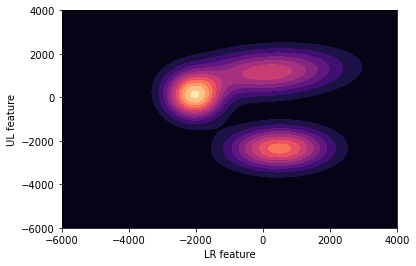

In [3]:
# init X and Y and pack them into a single 3d array
n_points = 200
X = np.linspace(-6000, 4000, n_points)
Y = np.linspace(-6000, 4000, n_points)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# density functions
Z1 = D1['Prior'] * multivariate_normal.pdf(pos, D1['Mean'], D1['Cov'])
Z2 = D2['Prior'] * multivariate_normal.pdf(pos, D2['Mean'], D2['Cov'])
Z3 = D3['Prior'] * multivariate_normal.pdf(pos, D3['Mean'], D3['Cov'])

# Plot projected filled contour of density function.
plt.subplot()
cset = plt.contourf(X, Y, Z1 + Z2 + Z3, levels=13, cmap='magma')
plt.xlabel("LR feature")
plt.ylabel("UL feature")
plt.savefig("multivariate_density.png")

#### Classification

In [4]:
# compute features
xs = compute_measurement_lr_cont(images)
ys = compute_measurement_ul_cont(images)

# classify
n_images = np.shape(images)[2]
classified_labels = np.zeros(n_images)
for i in range(n_images):
    # for i-th image, calculate a posteriori probability of each class
    p1 = D1['Prior'] * multivariate_normal.pdf([xs[i], ys[i]] , D1['Mean'], D1['Cov'])
    p2 = D2['Prior'] * multivariate_normal.pdf([xs[i], ys[i]] , D2['Mean'], D2['Cov'])
    p3 = D3['Prior'] * multivariate_normal.pdf([xs[i], ys[i]] , D3['Mean'], D3['Cov'])
    # choose the most probably class
    classified_labels[i] = np.argmax(np.array([p1, p2, p3]))

In [7]:
# calculate classification error
error = float(np.sum(classified_labels != labels) / n_images)
print('Classification error: {} %'.format(error * 100))

Classification error: 7.5 %


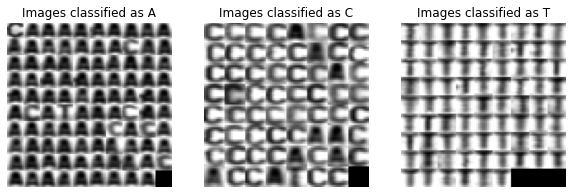

In [9]:
# draw the images per class

I_A = images[:,:,classified_labels == 0]
I_C = images[:,:,classified_labels == 1]
I_T = images[:,:,classified_labels == 2]

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(montage(I_A), cmap='gray')
plt.title('Images classified as A')

plt.subplot(1, 3, 2)
plt.imshow(montage(I_C), cmap='gray')
plt.title('Images classified as C')

plt.subplot(1, 3, 3)
plt.imshow(montage(I_T), cmap='gray')
plt.title('Images classified as T')

plt.savefig("decision_multivariate.png")